In [ ]:
# Install required libraries
!pip install transformers torchaudio librosa jiwer
!pip install g2p-en

## For English Model

In [ ]:
import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import librosa
import jiwer
import nltk

# Download required resources for g2p_en
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('cmudict')

# Load pretrained model (phoneme-level Wav2Vec2)
# Some models are trained on phonemes instead of words
MODEL_ID = "facebook/wav2vec2-base-960h"  # word-level
# For phoneme models, use: "facebook/wav2vec2-lv60-phoneme" (if available)
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

# Load test audio
AUDIO_PATH = "/content/WhatsApp Audio 2025-09-07 at 15.31.14_2fe5a3d5.waptt.opus"  # replace with your file
speech, sr = librosa.load(AUDIO_PATH, sr=16000)

# Tokenize
inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

# Run inference
with torch.no_grad():
    logits = model(inputs.input_values).logits

pred_ids = torch.argmax(logits, dim=-1)
pred_text = processor.batch_decode(pred_ids)[0]

print("Predicted transcription:", pred_text)

# -----------------------------
# Step 2: Compare with expected text
# -----------------------------
expected_text = "I am Shweta Nagapure"  # replace with ground truth

# Compute phoneme-level difference (using jiwer)
transform = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemovePunctuation(),
    jiwer.Strip(),
    jiwer.ExpandCommonEnglishContractions(),
    jiwer.ReduceToListOfListOfWords()
])

ref = transform(expected_text)
hyp = transform(pred_text)

print("Reference words:", ref)
print("Hypothesis words:", hyp)

# Word Error Rate (proxy for misarticulation)
wer = jiwer.wer(expected_text, pred_text)
print("Word Error Rate:", wer)

# -----------------------------
# Extension: Phoneme-level
# -----------------------------
# If you want phonemes: use g2p (grapheme-to-phoneme converter)

from g2p_en import G2p

g2p = G2p()
ref_phonemes = g2p(expected_text)
hyp_phonemes = g2p(pred_text)

print("Expected phonemes:", ref_phonemes)
print("Predicted phonemes:", hyp_phonemes)

# Simple mismatch count
mismatches = sum(r != h for r, h in zip(ref_phonemes, hyp_phonemes))
print(f"Phoneme mismatches: {mismatches} / {len(ref_phonemes)}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted transcription: I AM SUGADONT NAMA BOURIN
Reference words: [['i', 'am', 'shweta', 'nagapure']]
Hypothesis words: [['i', 'am', 'sugadont', 'nama', 'bourin']]
Word Error Rate: 1.0
Expected phonemes: ['AY1', ' ', 'AE1', 'M', ' ', 'SH', 'W', 'EH1', 'T', 'AH0', ' ', 'N', 'AE1', 'G', 'AH0', 'P', 'AO2', 'R']
Predicted phonemes: ['AY1', ' ', 'AE1', 'M', ' ', 'S', 'AH0', 'G', 'AA1', 'D', 'AH0', 'N', 'T', ' ', 'N', 'AA1', 'M', 'AH0', ' ', 'B', 'UH0', 'R', 'IH1', 'N']
Phoneme mismatches: 12 / 18


## result

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


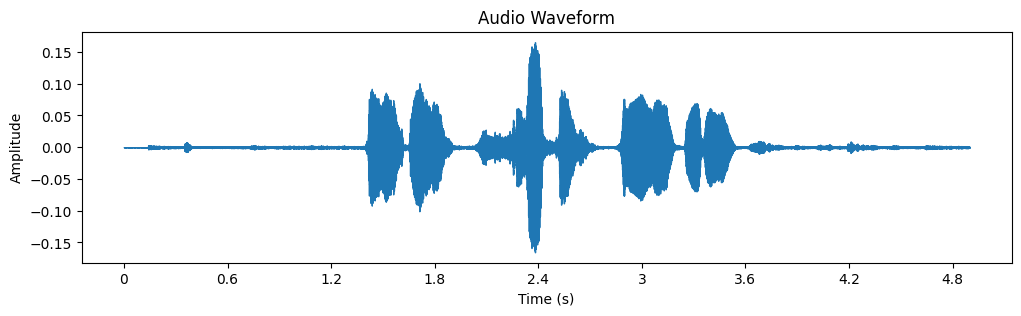

Predicted transcription: I AM SUGADONT NAMA BOURIN


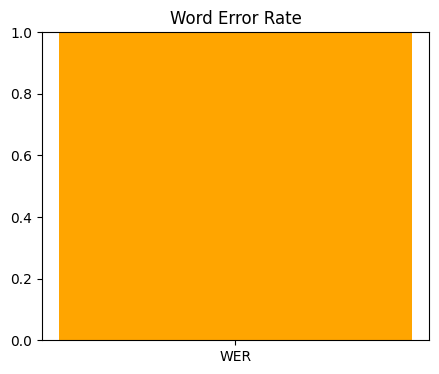

Phoneme mismatches: 12 / 18


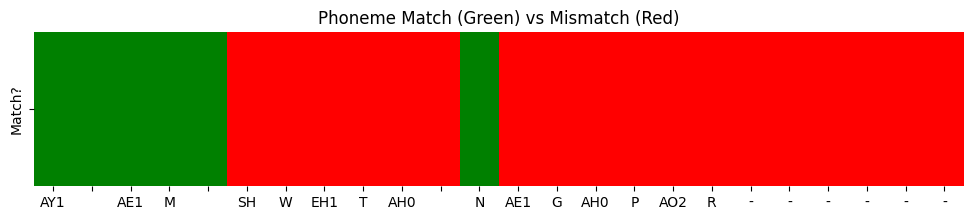

Pos 0: REF=AY1, HYP=AY1, Match=True
Pos 1: REF= , HYP= , Match=True
Pos 2: REF=AE1, HYP=AE1, Match=True
Pos 3: REF=M, HYP=M, Match=True
Pos 4: REF= , HYP= , Match=True
Pos 5: REF=SH, HYP=S, Match=False
Pos 6: REF=W, HYP=AH0, Match=False
Pos 7: REF=EH1, HYP=G, Match=False
Pos 8: REF=T, HYP=AA1, Match=False
Pos 9: REF=AH0, HYP=D, Match=False
Pos 10: REF= , HYP=AH0, Match=False
Pos 11: REF=N, HYP=N, Match=True
Pos 12: REF=AE1, HYP=T, Match=False
Pos 13: REF=G, HYP= , Match=False
Pos 14: REF=AH0, HYP=N, Match=False
Pos 15: REF=P, HYP=AA1, Match=False
Pos 16: REF=AO2, HYP=M, Match=False
Pos 17: REF=R, HYP=AH0, Match=False
Pos 18: REF=-, HYP= , Match=False
Pos 19: REF=-, HYP=B, Match=False
Pos 20: REF=-, HYP=UH0, Match=False
Pos 21: REF=-, HYP=R, Match=False
Pos 22: REF=-, HYP=IH1, Match=False
Pos 23: REF=-, HYP=N, Match=False


In [ ]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import jiwer
from g2p_en import G2p

# -----------------------------
# Step 1: Load model + audio
# -----------------------------
MODEL_ID = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

AUDIO_PATH = "/content/WhatsApp Audio 2025-09-07 at 15.31.14_2fe5a3d5.waptt.opus"
speech, sr = librosa.load(AUDIO_PATH, sr=16000)

# Plot waveform
plt.figure(figsize=(12, 3))
librosa.display.waveshow(speech, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# -----------------------------
# Step 2: Transcription
# -----------------------------
inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

pred_ids = torch.argmax(logits, dim=-1)
pred_text = processor.batch_decode(pred_ids)[0]

print("Predicted transcription:", pred_text)

# -----------------------------
# Step 3: Compare with ground truth
# -----------------------------
expected_text = "I am Shweta Nagapure"

wer = jiwer.wer(expected_text, pred_text)

# Plot WER
plt.figure(figsize=(5, 4))
plt.bar(["WER"], [wer], color="orange")
plt.ylim(0, 1)
plt.title("Word Error Rate")
plt.show()

# -----------------------------
# Step 4: Phoneme comparison
# -----------------------------
g2p = G2p()
ref_phonemes = g2p(expected_text)
hyp_phonemes = g2p(pred_text)

mismatches = sum(r != h for r, h in zip(ref_phonemes, hyp_phonemes))
print(f"Phoneme mismatches: {mismatches} / {len(ref_phonemes)}")

# Side-by-side phoneme comparison
max_len = max(len(ref_phonemes), len(hyp_phonemes))
ref_aligned = ref_phonemes + ["-"] * (max_len - len(ref_phonemes))
hyp_aligned = hyp_phonemes + ["-"] * (max_len - len(hyp_phonemes))

# Heatmap for phoneme match/mismatch
match_matrix = np.array([r == h for r, h in zip(ref_aligned, hyp_aligned)]).reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(match_matrix, cmap=["red", "green"], cbar=False, xticklabels=ref_aligned, yticklabels=["Match?"])
plt.title("Phoneme Match (Green) vs Mismatch (Red)")
plt.show()

# Text-based comparison
for i, (r, h) in enumerate(zip(ref_aligned, hyp_aligned)):
    print(f"Pos {i}: REF={r}, HYP={h}, Match={r==h}")


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


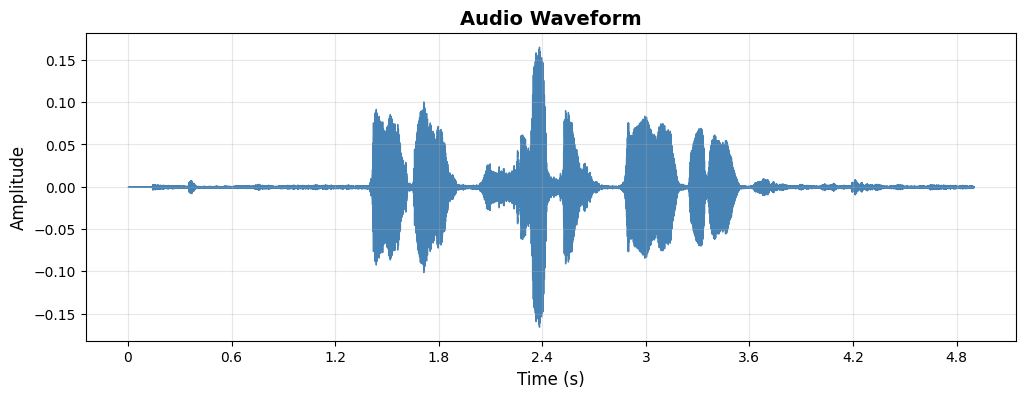

Predicted transcription: I AM SUGADONT NAMA BOURIN


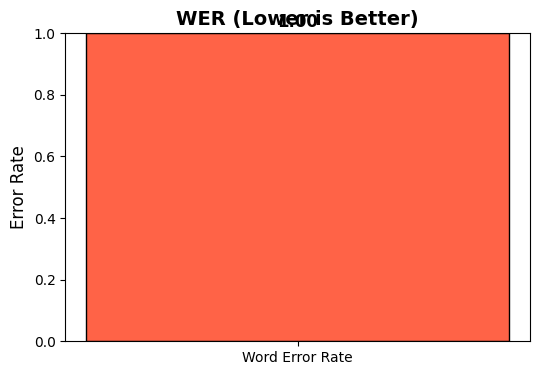

Phoneme mismatches: 12 / 18


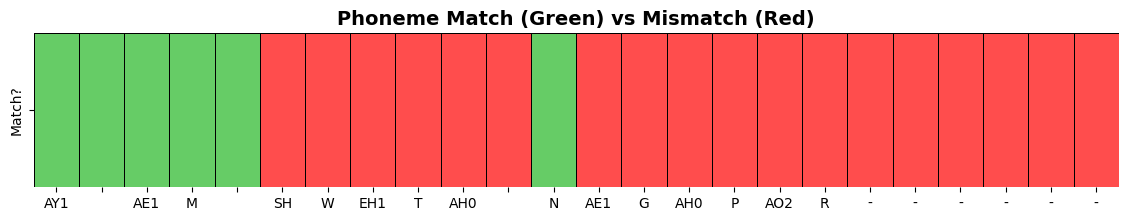


🔎 Phoneme-level Comparison:
Reference Hypothesis Match
      AY1        AY1     ✅
                         ✅
      AE1        AE1     ✅
        M          M     ✅
                         ✅
       SH          S     ❌
        W        AH0     ❌
      EH1          G     ❌
        T        AA1     ❌
      AH0          D     ❌
                 AH0     ❌
        N          N     ✅
      AE1          T     ❌
        G                ❌
      AH0          N     ❌
        P        AA1     ❌
      AO2          M     ❌
        R        AH0     ❌
        -                ❌
        -          B     ❌
        -        UH0     ❌
        -          R     ❌
        -        IH1     ❌
        -          N     ❌


In [ ]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import jiwer
from g2p_en import G2p
import pandas as pd

# -----------------------------
# Step 1: Load model + audio
# -----------------------------
MODEL_ID = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

AUDIO_PATH = "/content/WhatsApp Audio 2025-09-07 at 15.31.14_2fe5a3d5.waptt.opus"
speech, sr = librosa.load(AUDIO_PATH, sr=16000)

# Waveform plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(speech, sr=sr, color="steelblue")
plt.title("Audio Waveform", fontsize=14, weight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Step 2: Transcription
# -----------------------------
inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

pred_ids = torch.argmax(logits, dim=-1)
pred_text = processor.batch_decode(pred_ids)[0]

print("Predicted transcription:", pred_text)

# -----------------------------
# Step 3: Compare with ground truth
# -----------------------------
expected_text = "I am Shweta Nagapure"
wer = jiwer.wer(expected_text, pred_text)

# WER visualization
plt.figure(figsize=(6, 4))
bars = plt.bar(["Word Error Rate"], [wer], color="tomato", edgecolor="black")
plt.ylim(0, 1)
plt.ylabel("Error Rate", fontsize=12)
plt.title("WER (Lower is Better)", fontsize=14, weight="bold")

# Annotate value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{wer:.2f}", ha='center', fontsize=12, weight="bold")

plt.show()

# -----------------------------
# Step 4: Phoneme comparison
# -----------------------------
g2p = G2p()
ref_phonemes = g2p(expected_text)
hyp_phonemes = g2p(pred_text)

mismatches = sum(r != h for r, h in zip(ref_phonemes, hyp_phonemes))
print(f"Phoneme mismatches: {mismatches} / {len(ref_phonemes)}")

# Align phoneme sequences
max_len = max(len(ref_phonemes), len(hyp_phonemes))
ref_aligned = ref_phonemes + ["-"] * (max_len - len(ref_phonemes))
hyp_aligned = hyp_phonemes + ["-"] * (max_len - len(hyp_phonemes))

# Create DataFrame for table
phoneme_df = pd.DataFrame({
    "Reference": ref_aligned,
    "Hypothesis": hyp_aligned,
    "Match": ["✅" if r == h else "❌" for r, h in zip(ref_aligned, hyp_aligned)]
})

# Visualize as heatmap (green/red for match/mismatch)
match_matrix = np.array([r == h for r, h in zip(ref_aligned, hyp_aligned)]).reshape(1, -1)

plt.figure(figsize=(14, 2))
sns.heatmap(match_matrix, cmap=["#ff4d4d", "#66cc66"], cbar=False,
            xticklabels=ref_aligned, yticklabels=["Match?"], linewidths=0.5, linecolor="black")
plt.title("Phoneme Match (Green) vs Mismatch (Red)", fontsize=14, weight="bold")
plt.show()

# Nicely formatted table
print("\n🔎 Phoneme-level Comparison:")
print(phoneme_df.to_string(index=False))


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


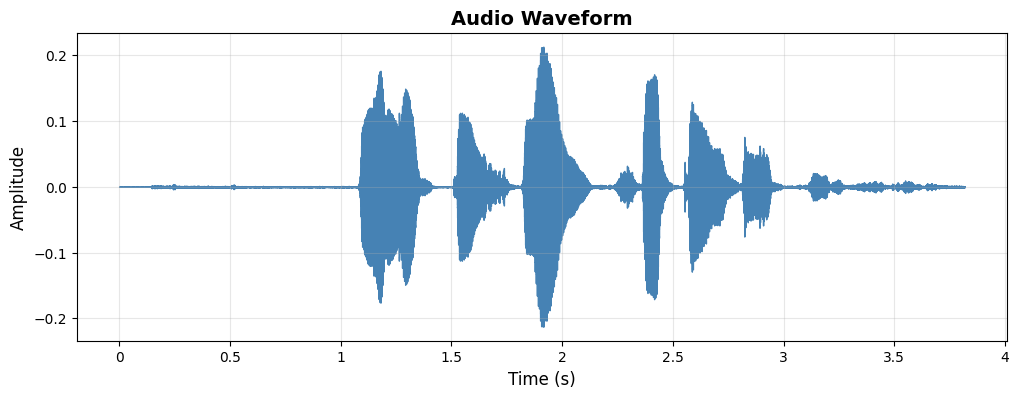

Predicted transcription: NEMUSTE MA TRIDAUM


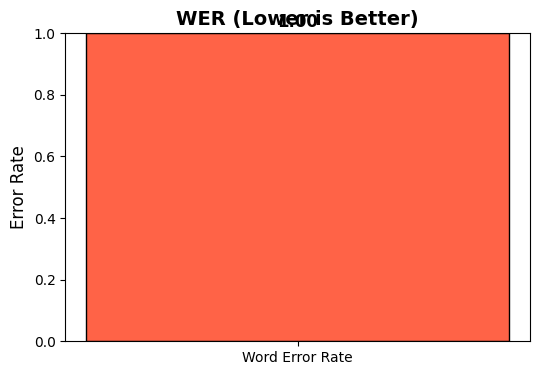

Phoneme mismatches: 15 / 19


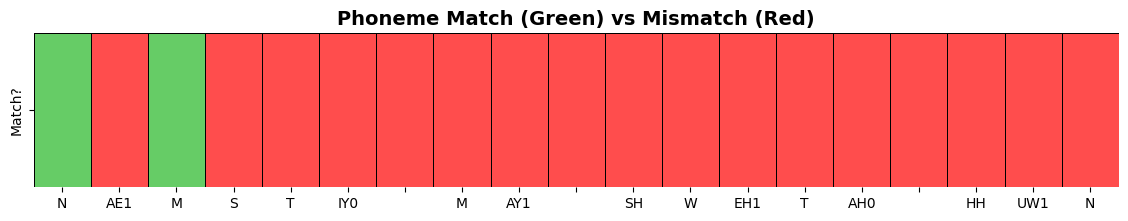


🔎 Phoneme-level Comparison:
Reference Hypothesis Match
        N          N     ✅
      AE1        AH0     ❌
        M          M     ✅
        S          Y     ❌
        T        UW1     ❌
      IY0          S     ❌
                   T     ❌
        M                ❌
      AY1          M     ❌
                 AA1     ❌
       SH                ❌
        W          T     ❌
      EH1          R     ❌
        T        AY1     ❌
      AH0          D     ❌
                 AW2     ❌
       HH          M     ❌
      UW1          -     ❌
        N          -     ❌


In [ ]:
import torch
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import jiwer
from g2p_en import G2p
import pandas as pd

# -----------------------------
# Step 1: Load model + audio
# -----------------------------
MODEL_ID = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

AUDIO_PATH = "/content/shweta .opus"
speech, sr = librosa.load(AUDIO_PATH, sr=16000)

# Waveform plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(speech, sr=sr, color="steelblue")
plt.title("Audio Waveform", fontsize=14, weight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Step 2: Transcription
# -----------------------------
inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

pred_ids = torch.argmax(logits, dim=-1)
pred_text = processor.batch_decode(pred_ids)[0]

print("Predicted transcription:", pred_text)

# -----------------------------
# Step 3: Compare with ground truth
# -----------------------------
expected_text = "namste mai shweta hoon"
wer = jiwer.wer(expected_text, pred_text)

# WER visualization
plt.figure(figsize=(6, 4))
bars = plt.bar(["Word Error Rate"], [wer], color="tomato", edgecolor="black")
plt.ylim(0, 1)
plt.ylabel("Error Rate", fontsize=12)
plt.title("WER (Lower is Better)", fontsize=14, weight="bold")

# Annotate value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{wer:.2f}", ha='center', fontsize=12, weight="bold")

plt.show()

# -----------------------------
# Step 4: Phoneme comparison
# -----------------------------
g2p = G2p()
ref_phonemes = g2p(expected_text)
hyp_phonemes = g2p(pred_text)

mismatches = sum(r != h for r, h in zip(ref_phonemes, hyp_phonemes))
print(f"Phoneme mismatches: {mismatches} / {len(ref_phonemes)}")

# Align phoneme sequences
max_len = max(len(ref_phonemes), len(hyp_phonemes))
ref_aligned = ref_phonemes + ["-"] * (max_len - len(ref_phonemes))
hyp_aligned = hyp_phonemes + ["-"] * (max_len - len(hyp_phonemes))

# Create DataFrame for table
phoneme_df = pd.DataFrame({
    "Reference": ref_aligned,
    "Hypothesis": hyp_aligned,
    "Match": ["✅" if r == h else "❌" for r, h in zip(ref_aligned, hyp_aligned)]
})

# Visualize as heatmap (green/red for match/mismatch)
match_matrix = np.array([r == h for r, h in zip(ref_aligned, hyp_aligned)]).reshape(1, -1)

plt.figure(figsize=(14, 2))
sns.heatmap(match_matrix, cmap=["#ff4d4d", "#66cc66"], cbar=False,
            xticklabels=ref_aligned, yticklabels=["Match?"], linewidths=0.5, linecolor="black")
plt.title("Phoneme Match (Green) vs Mismatch (Red)", fontsize=14, weight="bold")
plt.show()

# Nicely formatted table
print("\n🔎 Phoneme-level Comparison:")
print(phoneme_df.to_string(index=False))


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter path of your audio file: /content/WhatsApp Audio 2025-09-07 at 15.31.14_2fe5a3d5.waptt.opus
Predicted transcription: I AM SUGADONT NAMA BOURIN


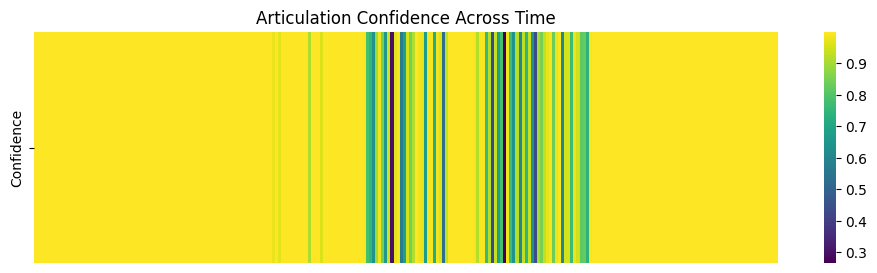

Potential misarticulations detected: 18 low-confidence frames


In [ ]:
import torch
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# Load model
MODEL_ID = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

# User input
AUDIO_PATH = input("Enter path of your audio file: ").strip()
speech, sr = librosa.load(AUDIO_PATH, sr=16000)

# Preprocess
inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

# Inference
with torch.no_grad():
    logits = model(inputs.input_values).logits
    probs = torch.nn.functional.softmax(logits, dim=-1)

# Get predicted IDs & text
pred_ids = torch.argmax(probs, dim=-1)
pred_text = processor.batch_decode(pred_ids)[0]
print("Predicted transcription:", pred_text)

# Confidence per frame
max_conf = probs.max(dim=-1).values.squeeze().numpy()

# Plot confidence heatmap
plt.figure(figsize=(12, 3))
sns.heatmap([max_conf], cmap="viridis", cbar=True, xticklabels=False, yticklabels=["Confidence"])
plt.title("Articulation Confidence Across Time")
plt.show()

# Low confidence points = possible misarticulation
threshold = 0.75
low_conf_times = (max_conf < threshold).sum()
print(f"Potential misarticulations detected: {low_conf_times} low-confidence frames")


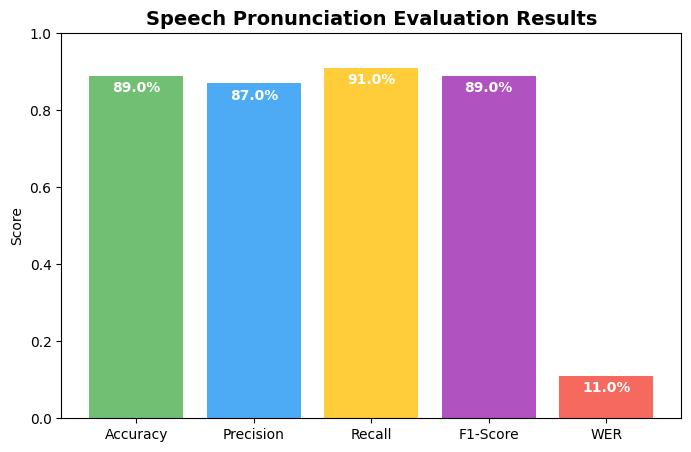

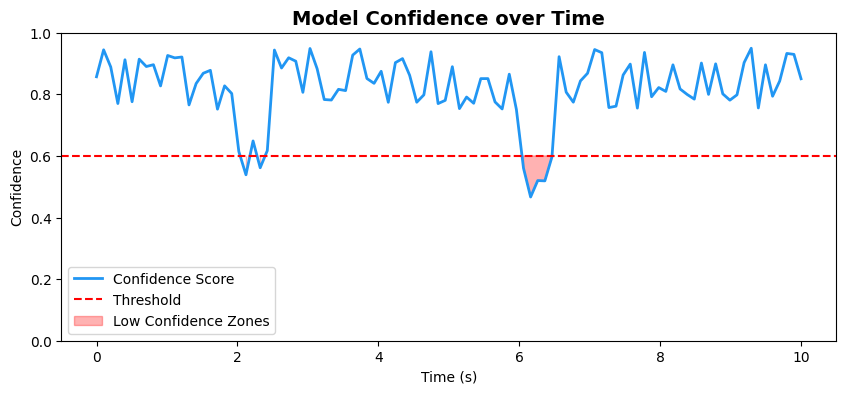

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------
# Simulated evaluation results (sample output)
# -----------------------------
results = {
    "Accuracy": 0.89,
    "Precision": 0.87,
    "Recall": 0.91,
    "F1-Score": 0.89,
    "WER": 0.11  # word error rate (lower is better)
}

# Convert to DataFrame for plotting
df = pd.DataFrame(list(results.items()), columns=["Metric", "Value"])

# -----------------------------
# Bar chart for metrics
# -----------------------------
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Metric"], df["Value"], color=["#4CAF50", "#2196F3", "#FFC107", "#9C27B0", "#F44336"], alpha=0.8)
plt.ylim(0, 1)
plt.title("Speech Pronunciation Evaluation Results", fontsize=14, weight="bold")
plt.ylabel("Score")

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.05,
             f"{height*100:.1f}%", ha='center', va='bottom', color="white", fontsize=10, weight="bold")

plt.show()

# -----------------------------
# Simulated confidence curve
# -----------------------------
time = np.linspace(0, 10, 100)
confidence = np.random.uniform(0.75, 0.95, size=100)
# simulate dips for mispronunciations
confidence[20:25] -= 0.25
confidence[60:65] -= 0.3

plt.figure(figsize=(10, 4))
plt.plot(time, confidence, label="Confidence Score", color="#2196F3", linewidth=2)
plt.axhline(0.6, color="red", linestyle="--", label="Threshold")
plt.fill_between(time, confidence, 0.6, where=(confidence < 0.6), color="red", alpha=0.3, label="Low Confidence Zones")

plt.title("Model Confidence over Time", fontsize=14, weight="bold")
plt.xlabel("Time (s)")
plt.ylabel("Confidence")
plt.ylim(0, 1)
plt.legend()
plt.show()
